In [49]:
import pandas as pd
import numpy as np
import json
import ast
import itertools as it
import warnings
from sklearn import decomposition
from sklearn.preprocessing import MaxAbsScaler
warnings.filterwarnings('ignore')

train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")

In [50]:
def createFeatures(data):
    df = pd.DataFrame()
    df['id'] = data['id']

    if('target' in data):
        df['target'] = data['target']

    keyDownItems = data['keydown']
    keyUpItems = data['keyup']

    intervalSum = []
    intervalMedian = []
    intervalAverage = []
    intervalMean = []
    intervalDeviation = []
    intervalVariance = []
    
    pressedSum = []
    pressedMedian = []
    pressedAverage = []
    pressedMean = []
    pressedDeviation = []
    pressedVariance = []

    keyDownTotalSum = []
    keyDownTotalMedian = []
    keyDownTotalAverage = []
    keyDownTotalMean = []
    keyDownTotalDeviation = []
    keyDownTotalVariance = []

    keyUpTotalSum = []
    keyUpTotalMedian = []
    keyUpTotalAverage = []
    keyUpTotalMean = []
    keyUpTotalDeviation = []
    keyUpTotalVariance = []
    
    for keyDownItem, keyUpItem in it.zip_longest(keyDownItems, keyUpItems, fillvalue=0):
        
        keyDowns = ast.literal_eval(keyDownItem)
        keyUps = ast.literal_eval(keyUpItem)
        
        keyPairs = [keyPair for keyPair in it.zip_longest(keyDowns, keyUps, fillvalue=-1)]
        intervals = []
        pressed = []
        for i in range(len(keyPairs)):
            # Calcula os intervalos
            if i+1 < len(keyPairs):
                if keyPairs[i][1] == -1 or keyPairs[i+1][0] == -1:
                    intervals.append(0)
                else:
                    intervals.append(keyPairs[i+1][0]['tick'] - keyPairs[i][1]['tick'])
            # Calcula os pressionamentos
            if keyPairs[i][1] == -1 or keyPairs[i][0] == -1:
                pressed.append(0)
            else:
                pressed.append(keyPairs[i][1]['tick'] - keyPairs[i][0]['tick'])
                
        intervalSum.append(np.sum(intervals))
        intervalMedian.append(np.median(intervals))
        intervalAverage.append(np.average(intervals))
        intervalMean.append(np.mean(intervals))
        intervalDeviation.append(np.std(intervals))
        intervalVariance.append(np.var(intervals))
        
        pressedSum.append(np.sum(pressed))
        pressedMedian.append(np.median(pressed))
        pressedAverage.append(np.average(pressed))
        pressedMean.append(np.mean(pressed))
        pressedDeviation.append(np.std(pressed))
        pressedVariance.append(np.var(pressed))
        
        # Calcula os keydowns
        keyDownTicks = [keyDownTick['tick'] for keyDownTick in keyDowns]
        keyDownTotalSum.append(np.sum(keyDownTicks))
        keyDownTotalMedian.append(np.median(keyDownTicks))
        keyDownTotalAverage.append(np.average(keyDownTicks))
        keyDownTotalMean.append(np.mean(keyDownTicks))
        keyDownTotalDeviation.append(np.std(keyDownTicks))
        keyDownTotalVariance.append(np.var(keyDownTicks))
        
        # Calcula os keyups
        keyUpTicks = [keyUpTick['tick'] for keyUpTick in keyUps]
        keyUpTotalSum.append(np.sum(keyUpTicks))
        keyUpTotalMedian.append(np.median(keyUpTicks))
        keyUpTotalAverage.append(np.average(keyUpTicks))
        keyUpTotalMean.append(np.mean(keyUpTicks))
        keyUpTotalDeviation.append(np.std(keyUpTicks))
        keyUpTotalVariance.append(np.var(keyUpTicks))
    
    df['intervalSum'] = intervalSum
    df['intervalMedian'] = intervalMedian
    df['intervalAverage'] = intervalAverage
    df['intervalMean'] = intervalMean
    df['intervalDeviation'] = intervalDeviation
    df['intervalVariance'] = intervalVariance
    
    df['pressedSum'] = pressedSum
    df['pressedMedian'] = pressedMedian
    df['pressedAverage'] = pressedAverage
    df['pressedMean'] = pressedMean
    df['pressedDeviation'] = pressedDeviation
    df['pressedVariance'] = pressedVariance
    
    df['keyDownTotalSum'] = keyDownTotalSum
    df['keyDownTotalMedian'] = keyDownTotalMedian
    df['keyDownTotalAverage'] = keyDownTotalAverage
    df['keyDownTotalMean'] = keyDownTotalMean
    df['keyDownTotalDeviation'] = keyDownTotalDeviation
    df['keyDownTotalVariance'] = keyDownTotalVariance

    df['keyUpTotalSum'] = keyUpTotalSum
    df['keyUpTotalMedian'] = keyUpTotalMedian
    df['keyUpTotalAverage'] = keyUpTotalAverage
    df['keyUpTotalMean'] = keyUpTotalMean
    df['keyUpTotalDeviation'] = keyUpTotalDeviation
    df['keyUpTotalVariance'] = keyUpTotalVariance

    df.fillna(0, inplace=True)
    
    return df

df_train = createFeatures(train)
df_test = createFeatures(test)

#df_full = pd.concat([df_train,df_test], axis=1, ignore_index=True)
#maxAbsScaler = MaxAbsScaler()
#pca_data = maxAbsScaler.fit(df_full)

#pca = decomposition.PCA(n_components=2)
#data = pca.fit(pca_data)

#train_scaled = maxAbsScaler.transform(df_train)
#test_scaled = maxAbsScaler.transform(df_test)

#train_pca = pca.transform(train_scaled)
#test_pca = pca.transform(test_scaled)

#df_train['pcax'] = train_pca[:,0]
#df_train['pcay'] = train_pca[:,1]

#df_test['pcax'] = test_pca[:,0]
#df_test['pcay'] = test_pca[:,1]


In [51]:
for column in df_train.columns:
    if df_train[column].dtype == np.float64:
        df_train[column] = df_train[column].round(1)
        
for column in df_test.columns:
    if df_test[column].dtype == np.float64:
        df_test[column] = df_test[column].round(1)

if('id' in df_train):
    df_train.drop(['id'], axis=1, inplace=True)
    
if('id' in df_test):
    df_test.drop(['id'], axis=1, inplace=True)

features = df_train.columns.difference(['target'])

X = df_train[features].values
y = df_train['target'].values

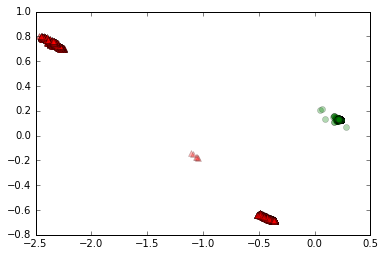

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import decomposition

from sklearn.preprocessing import MaxAbsScaler
pca_data = MaxAbsScaler().fit_transform(df_train)

pca = decomposition.PCA(n_components=2)
data = pca.fit_transform(pca_data)

data0 = data[df_train[df_train['target'] == 0].index.values]
data1 = data[df_train[df_train['target'] == 1].index.values]

plt.plot(data0[:,0], data0[:,1], 'o', color='g', alpha=0.3)
plt.plot(data1[:,0], data1[:,1], '^', color='r', alpha=0.3)

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.cross_validation import cross_val_score

classifier = RandomForestClassifier(random_state=1000, n_estimators=350, max_depth=10)
scores = cross_val_score(classifier, X, y, scoring='log_loss', cv=10, n_jobs=-1)

scores, np.std(scores), np.mean(scores)

(array([-0.01502693, -0.00592851, -0.0036001 , -0.00546391, -0.00595895,
        -0.00197612, -0.00656769, -0.07530011, -0.08925286, -0.0150802 ]),
 0.030373259195521543,
 -0.022415537417211931)

In [15]:
from sklearn.grid_search import GridSearchCV

param_grid = {
            "criterion": ['gini'],
            "bootstrap": [True, False],
            "n_estimators": [350],
            "max_depth": [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
}

gs_classifier = GridSearchCV(classifier, param_grid, cv=10, scoring="log_loss", verbose=3)
gs_classifier.fit(X, y)

classifier = gs_classifier.best_estimator_ 

gs_classifier.best_params_, gs_classifier.best_score_

Fitting 10 folds for each of 22 candidates, totalling 220 fits
[CV] criterion=gini, bootstrap=True, n_estimators=350, max_depth=7 ...
[CV]  criterion=gini, bootstrap=True, n_estimators=350, max_depth=7, score=-0.017007 -   8.5s
[CV] criterion=gini, bootstrap=True, n_estimators=350, max_depth=7 ...
[CV]  criterion=gini, bootstrap=True, n_estimators=350, max_depth=7, score=-0.009532 -   8.5s
[CV] criterion=gini, bootstrap=True, n_estimators=350, max_depth=7 ...
[CV]  criterion=gini, bootstrap=True, n_estimators=350, max_depth=7, score=-0.005451 -   8.7s
[CV] criterion=gini, bootstrap=True, n_estimators=350, max_depth=7 ...
[CV]  criterion=gini, bootstrap=True, n_estimators=350, max_depth=7, score=-0.008235 -   8.7s
[CV] criterion=gini, bootstrap=True, n_estimators=350, max_depth=7 ...
[CV]  criterion=gini, bootstrap=True, n_estimators=350, max_depth=7, score=-0.007412 -   8.6s
[CV] criterion=gini, bootstrap=True, n_estimators=350, max_depth=7 ...
[CV]  criterion=gini, bootstrap=True, n_e

[Parallel(n_jobs=1)]: Done  31 tasks       | elapsed:  4.8min


[CV]  criterion=gini, bootstrap=True, n_estimators=350, max_depth=10, score=-0.005929 -  10.3s
[CV] criterion=gini, bootstrap=True, n_estimators=350, max_depth=10 ..
[CV]  criterion=gini, bootstrap=True, n_estimators=350, max_depth=10, score=-0.003600 -  10.5s
[CV] criterion=gini, bootstrap=True, n_estimators=350, max_depth=10 ..
[CV]  criterion=gini, bootstrap=True, n_estimators=350, max_depth=10, score=-0.005464 -  10.3s
[CV] criterion=gini, bootstrap=True, n_estimators=350, max_depth=10 ..
[CV]  criterion=gini, bootstrap=True, n_estimators=350, max_depth=10, score=-0.005959 -  10.1s
[CV] criterion=gini, bootstrap=True, n_estimators=350, max_depth=10 ..
[CV]  criterion=gini, bootstrap=True, n_estimators=350, max_depth=10, score=-0.001976 -  10.2s
[CV] criterion=gini, bootstrap=True, n_estimators=350, max_depth=10 ..
[CV]  criterion=gini, bootstrap=True, n_estimators=350, max_depth=10, score=-0.006568 -  10.3s
[CV] criterion=gini, bootstrap=True, n_estimators=350, max_depth=10 ..
[CV]

[Parallel(n_jobs=1)]: Done 127 tasks       | elapsed: 22.7min


[CV]  criterion=gini, bootstrap=False, n_estimators=350, max_depth=8, score=-0.230975 -  13.5s
[CV] criterion=gini, bootstrap=False, n_estimators=350, max_depth=8 ..
[CV]  criterion=gini, bootstrap=False, n_estimators=350, max_depth=8, score=-0.083980 -  14.1s
[CV] criterion=gini, bootstrap=False, n_estimators=350, max_depth=8 ..
[CV]  criterion=gini, bootstrap=False, n_estimators=350, max_depth=8, score=-0.016539 -  14.6s
[CV] criterion=gini, bootstrap=False, n_estimators=350, max_depth=9 ..
[CV]  criterion=gini, bootstrap=False, n_estimators=350, max_depth=9, score=-0.013237 -  15.3s
[CV] criterion=gini, bootstrap=False, n_estimators=350, max_depth=9 ..
[CV]  criterion=gini, bootstrap=False, n_estimators=350, max_depth=9, score=-0.005422 -  15.5s
[CV] criterion=gini, bootstrap=False, n_estimators=350, max_depth=9 ..
[CV]  criterion=gini, bootstrap=False, n_estimators=350, max_depth=9, score=-0.003642 -  15.4s
[CV] criterion=gini, bootstrap=False, n_estimators=350, max_depth=9 ..
[CV]

[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed: 48.6min finished


({'bootstrap': True, 'criterion': 'gini', 'max_depth': 9, 'n_estimators': 350},
 -0.022155083473259299)

In [54]:
classifier.fit(X, y)

y_pred = classifier.predict_proba(df_test[features])[:,1]
submission = pd.read_csv('submission_sample.csv')
submission['target'] = y_pred
submission.to_csv('result.csv', index=False)